# Data Analysis Mathematics, Algorithms and Modeling

## AI Powered Recipe Recommendation System 

### Team : Group 3
| Student No  | First Name                  | Last Name     |
|-------------|-----------------------------|---------------|
| 9041129     | Nidhi                       | Ahir          |
| 9016986     | Keerthi                     | Gonuguntla    |
| 9027375     | Khushbu                     | Lad           |

#### Introduction

K-means clustering is used in this project to find patterns in the data by grouping features that show commonalities. By examining these clusters, we can learn more about the underlying data structures and demonstrate how useful k-means clustering is for pattern identification and exploratory data analysis.

### Dataset & Programming Requirements

##### Ractangular Dataset : files
1. Raw_recepes.csv
2. Raw_interaction.csv

##### Import Libraries

In [2]:
import numpy as np
import pandas as pd 
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import scipy.stats as zscore
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

##### RawRecipe : Dataset in classes and methods

In [3]:
class RawRecipe:
    def __init__(self):
        self.file_path = './Dataset/RAW_recipes.csv'
        self.data = None
    
    # Loads the data from a CSV file.
    def load_data(self):
        self.data = pd.read_csv(self.file_path)
        print(f"---> STEP 1 : Loads the data from a CSV file. \r\n")
        print(f"RAW_recipes.csv : Data loaded successfully.")
        print(f"Total Records : {self.data.shape[0]} \r\n")
        return self.data

##### RAW_interactions : Dataset in classes and methods

In [4]:
class RecepeInteraction:
    def __init__(self):
        self.file_path = './Dataset/RAW_interactions.csv'
        self.data = None
    
    # Loads the data from a CSV file.
    def load_data(self):
        self.data = pd.read_csv(self.file_path)
        print(f"---> STEP 1 : Loads the data from a CSV file. \r\n")
        print(f"RAW_interactions.csv : Data loaded successfully.")
        print(f"Total Records : {self.data.shape[0]} \r\n")
        return self.data
    
    def view_sample_data(self):
        self.data.head(5)

    # Data quality : Null Check
    def check_null_values(self):
        print(f"---> STEP 2 : Null Check for data \r\n")
        if self.data is not None:
            nulls = self.data.isnull().sum()
            print(nulls)
            return nulls
        else:
            print("Data not loaded.")
     # Data quality : Duplicate Check
    def check_duplicate_values(self):
        print(f"\r\n---> STEP 3 : Duplicate data Check for recepe \r\n")
        if self.data is not None:
            counts = self.data["recipe_id"].value_counts()
            dupl = (counts[counts>1]).reset_index()
            dupl.columns = ["recipe_id", "Count"]
            print(dupl)
            return dupl
        else:
            print("Data not loaded.")

#### The main function : Initialise class objects & load data

In [5]:
if __name__ == "__main__":

    # Create an instance of the RecepeInteraction  class and load data
    interactionData = RecepeInteraction()
    interactionData.load_data()

    # Create an instance of the RecepeInteraction  class and load data
    recepeData = RawRecipe()
    recepeData.load_data()

---> STEP 1 : Loads the data from a CSV file. 

RAW_interactions.csv : Data loaded successfully.
Total Records : 1132367 

---> STEP 1 : Loads the data from a CSV file. 

RAW_recipes.csv : Data loaded successfully.
Total Records : 231637 



#### Merge dataset based on recepe Id

In [6]:
# Merge data using common field recepe Id
merged_data = pd.merge(recepeData.data, interactionData.data, left_on='id', right_on='recipe_id')
print("Data Merged Successfully")
merged_data.head(2)

Data Merged Successfully


,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,user_id,recipe_id,date,rating,review
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,4470,137739,2006-02-18,5,I used an acorn squash and recipe#137681 Swee...
1,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,593927,137739,2010-08-21,5,This was a nice change. I used butternut squas...


### Data Preprocessing for clustering

In [7]:
merged_data['minutes'] = merged_data['minutes'].fillna(1).replace(0, 1)
merged_data['n_ingredients'] = merged_data['n_ingredients'].fillna(1).replace(0, 1)
merged_data['n_steps'] = merged_data['n_steps'].fillna(1).replace(0, 1)
# Create new feature : complexity  --> Based on cooking efforts
merged_data['complexity'] = merged_data['minutes'] * merged_data['n_ingredients'] * merged_data['n_steps']
# Create new feature : popularity --> Based on rating and reviews
merged_data['popularity'] = merged_data['rating'] * ((merged_data['review'].fillna("").astype(str).apply(len)) + 1)
merged_data.head(20)

# Normalise new features
min_value = merged_data['complexity'].min()
max_value = merged_data['complexity'].max()
merged_data['complexity_norm'] = (merged_data['complexity'] - min_value) / (max_value - min_value)

min_value2 = merged_data['popularity'].min()
max_value2 = merged_data['popularity'].max()
merged_data['popularity_norm'] = (merged_data['popularity'] - min_value2) / (max_value2 - min_value2)

min_value3 = merged_data['rating'].min()
max_value3 = merged_data['rating'].max()
merged_data['rating_norm'] = (merged_data['rating'] - min_value3) / (max_value3 - min_value3)



### Understand data distribution

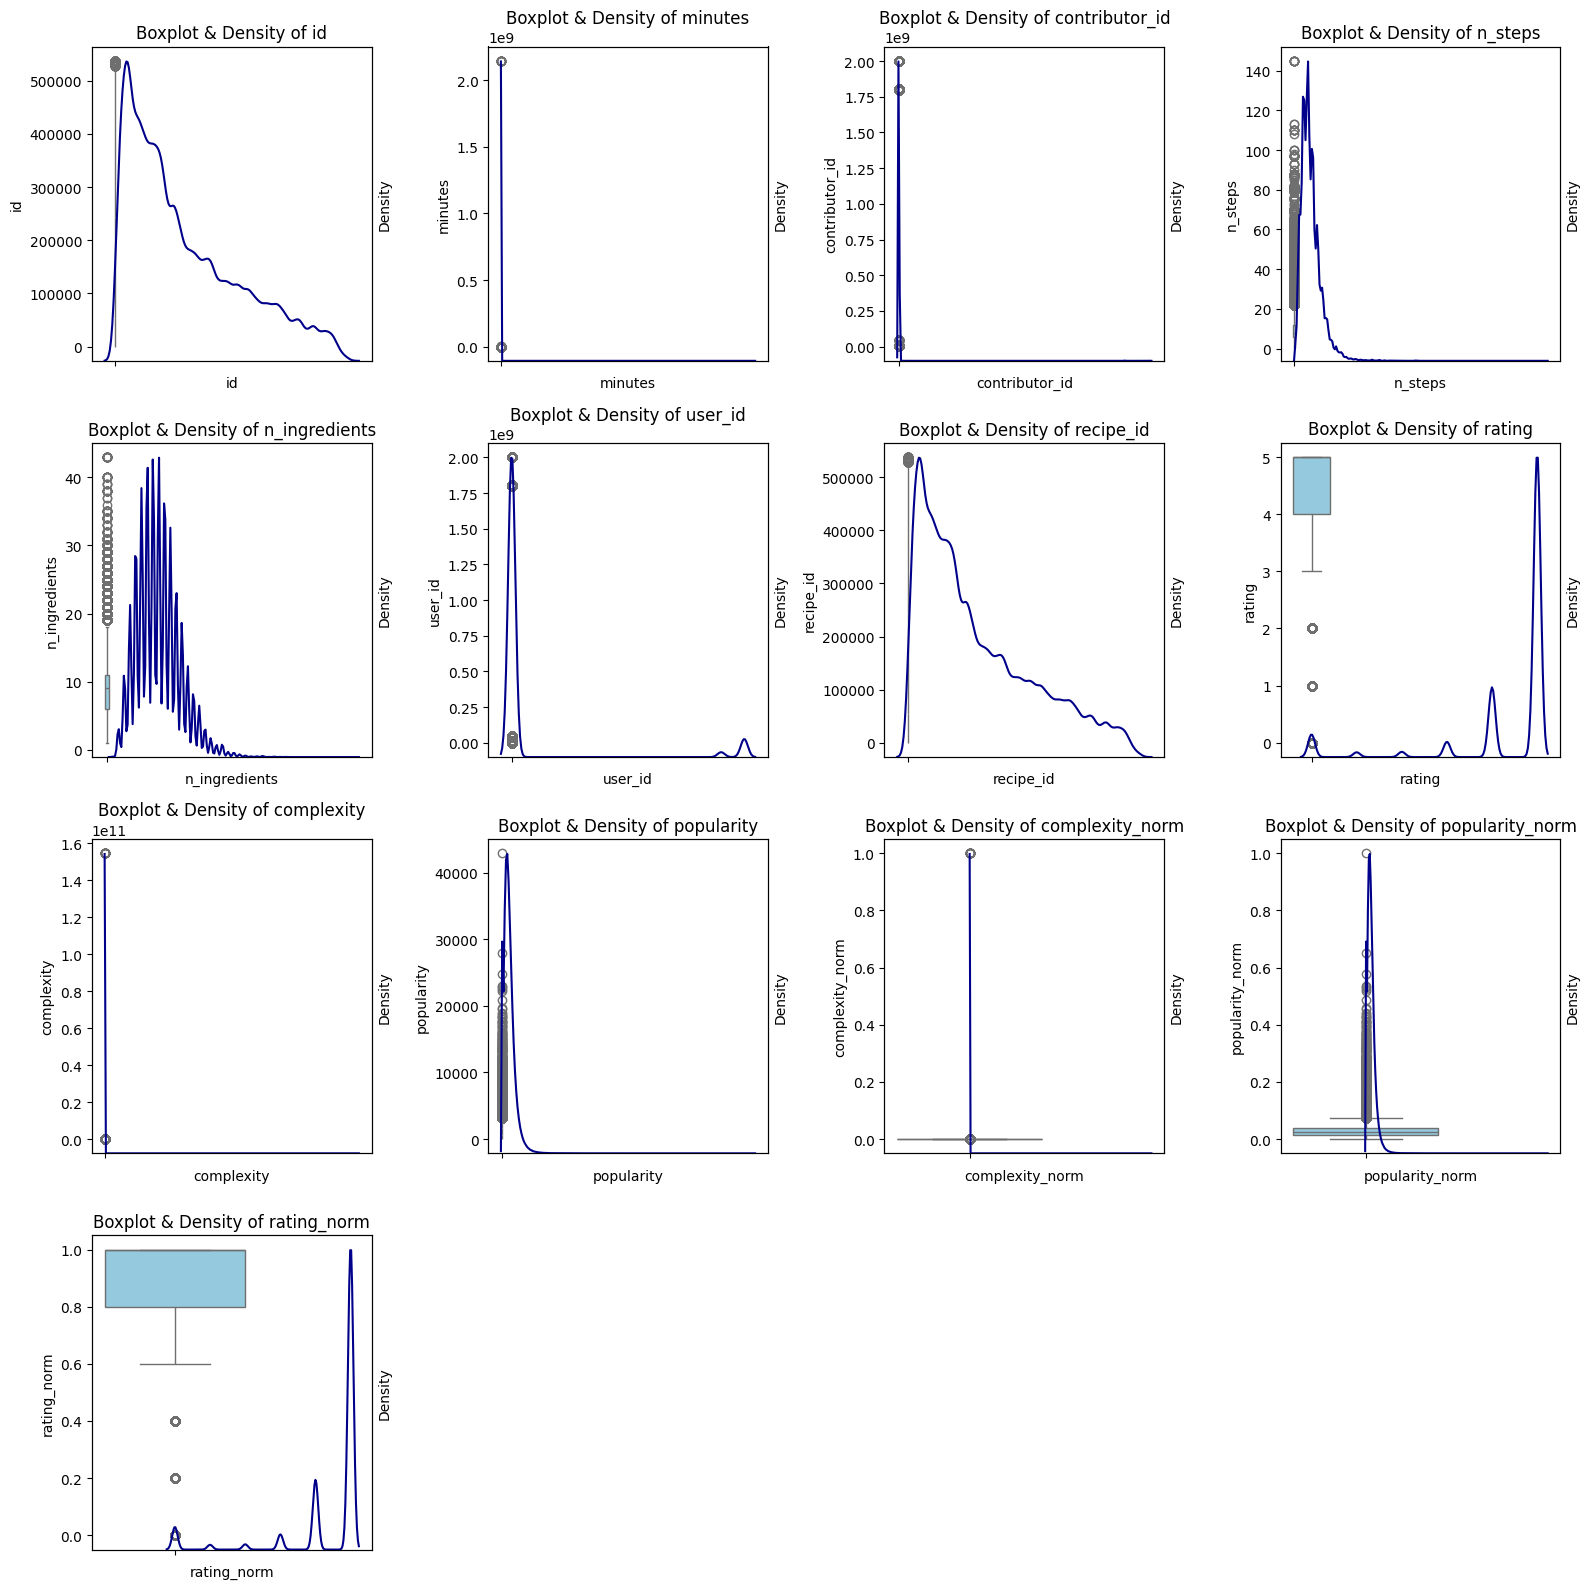

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the subplots with 4x4 grid and larger figure size
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))
axes = axes.flatten()

# Get only numeric columns
numeric_columns = merged_data.select_dtypes(include=['number']).columns

# Plot both boxplot and density plot for each numeric column
for i, column in enumerate(numeric_columns):
    # Plot boxplot
    sns.boxplot(y=merged_data[column], ax=axes[i], color='skyblue')
    axes[i].set_title(f'Boxplot & Density of {column}')
    axes[i].set_xlabel(column)
    
    # Create a secondary axis for the density plot
    ax2 = axes[i].twinx()  # Create a secondary y-axis for density plot
    sns.kdeplot(merged_data[column], ax=ax2, color='darkblue')
    ax2.set_yticks([])  # Hide y-axis ticks for density plot to avoid clutter

# Hide unused axes
for i in range(len(numeric_columns), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()


#### Understand Corelation between column 

In [9]:
df = merged_data.apply(pd.to_numeric, errors = 'coerce')
corr_mat = df.corr()
print(corr_mat)

                 name        id   minutes  contributor_id  submitted  tags  \
name              NaN       NaN       NaN             NaN        NaN   NaN   
id                NaN  1.000000  0.003164        0.102952        NaN   NaN   
minutes           NaN  0.003164  1.000000       -0.000133        NaN   NaN   
contributor_id    NaN  0.102952 -0.000133        1.000000        NaN   NaN   
submitted         NaN       NaN       NaN             NaN        NaN   NaN   
tags              NaN       NaN       NaN             NaN        NaN   NaN   
nutrition         NaN       NaN       NaN             NaN        NaN   NaN   
n_steps           NaN  0.056699 -0.000438        0.027721        NaN   NaN   
steps             NaN       NaN       NaN             NaN        NaN   NaN   
description       NaN       NaN       NaN             NaN        NaN   NaN   
ingredients       NaN       NaN       NaN             NaN        NaN   NaN   
n_ingredients     NaN  0.018120 -0.001059        0.005379       

### Apply K-Means to identify patterns

#### K-Means Clustering : Single Feature : Complexity

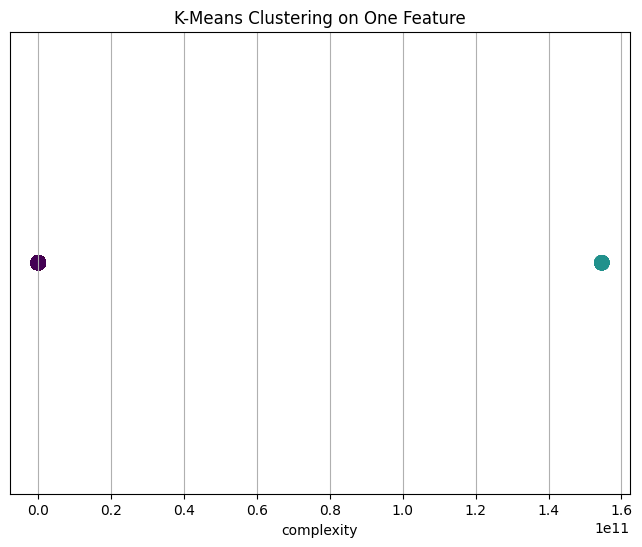

In [10]:
from sklearn.cluster import KMeans
X = merged_data[['complexity']].values

# Apply k-means clustering
kmeans = KMeans(n_clusters=3, random_state=0)  # Specify the number of clusters
merged_data['cluster'] = kmeans.fit_predict(X)

# Plotting the results
plt.figure(figsize=(8, 6))
plt.scatter(merged_data['complexity'], np.zeros_like(merged_data['complexity']), c=merged_data['cluster'], cmap='viridis', s=100)
plt.title('K-Means Clustering on One Feature')
plt.xlabel('complexity')
plt.yticks([])  # Hide y-axis ticks
plt.grid(axis='x')
plt.show()


#### K-Means Clustering : Single Feature : Popularity



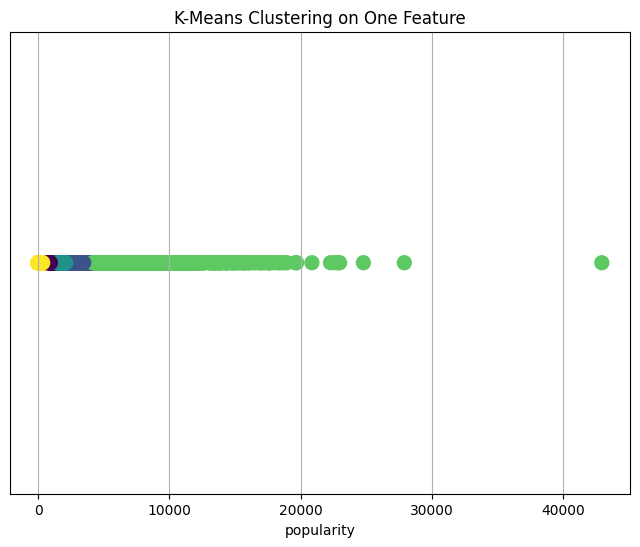

In [11]:
from sklearn.cluster import KMeans
X = merged_data[['popularity']].values

# Apply k-means clustering
kmeans = KMeans(n_clusters=5, random_state=0)  # Specify the number of clusters
merged_data['cluster'] = kmeans.fit_predict(X)

# Plotting the results
plt.figure(figsize=(8, 6))
plt.scatter(merged_data['popularity'], np.zeros_like(merged_data['popularity']), c=merged_data['cluster'], cmap='viridis', s=100)
plt.title('K-Means Clustering on One Feature')
plt.xlabel('popularity')
plt.yticks([])  # Hide y-axis ticks
plt.grid(axis='x')
plt.show()


#### K-Means Clustering : Two Feature : Popularity & Complexity

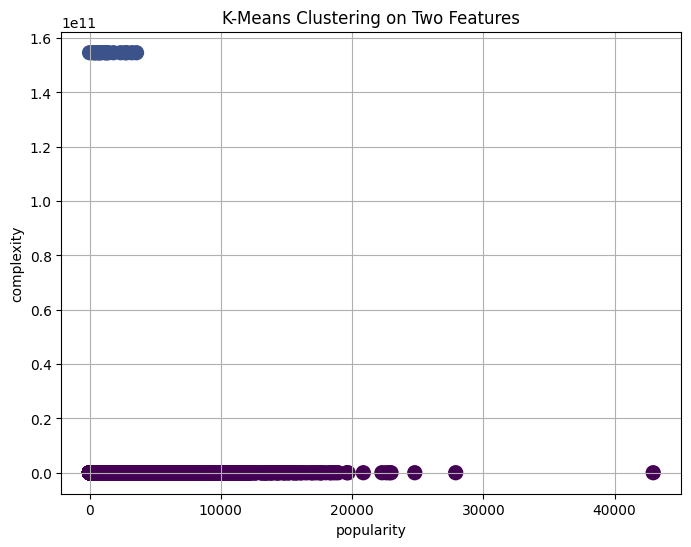

In [12]:
# Reshape data for k-means (it requires a 2D array)
X = merged_data[['popularity', 'complexity']].values

# Apply k-means clustering
kmeans = KMeans(n_clusters=5, random_state=0)  # Specify the number of clusters
merged_data['cluster'] = kmeans.fit_predict(X)

# Plotting the results
plt.figure(figsize=(8, 6))
plt.scatter(merged_data['popularity'], merged_data['complexity'], c=merged_data['cluster'], cmap='viridis', s=100)
plt.title('K-Means Clustering on Two Features')
plt.xlabel('popularity')
plt.ylabel('complexity')
plt.grid()
plt.show()

#### K-Means Clustering : Two Feature : Recipe Id & Complexity

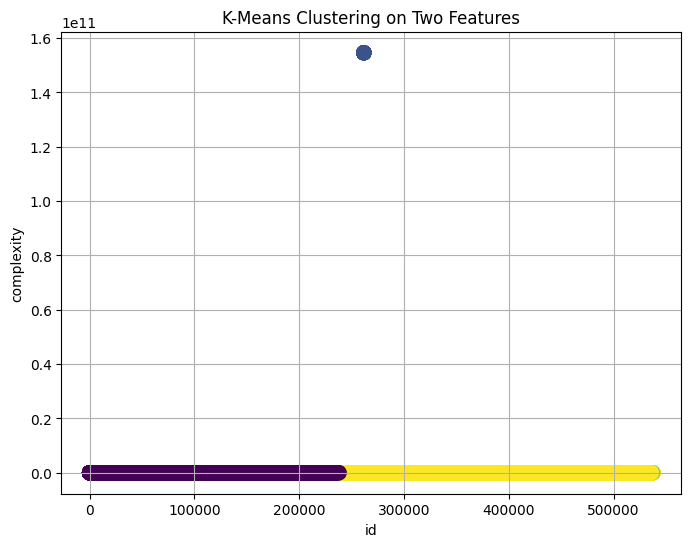

In [13]:
# Reshape data for k-means (it requires a 2D array)
X = merged_data[['id', 'complexity']].values

# Apply k-means clustering
kmeans = KMeans(n_clusters=5, random_state=0)  # Specify the number of clusters
merged_data['cluster'] = kmeans.fit_predict(X)

# Plotting the results
plt.figure(figsize=(8, 6))
plt.scatter(merged_data['id'], merged_data['complexity'], c=merged_data['cluster'], cmap='viridis', s=100)
plt.title('K-Means Clustering on Two Features')
plt.xlabel('id')
plt.ylabel('complexity')
plt.grid()
plt.show()

#### K-Means Clustering : Two Feature : popularity & rating - Standardized

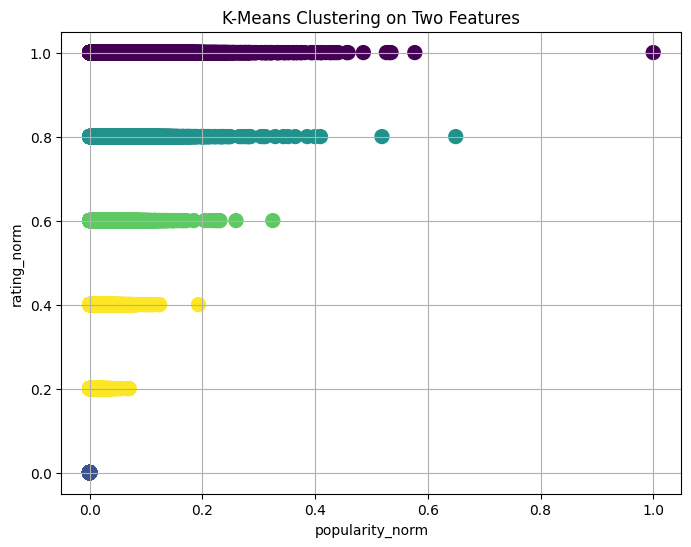

In [14]:
# Reshape data for k-means (it requires a 2D array)
X = merged_data[['popularity_norm', 'rating_norm']].values

# Apply k-means clustering
kmeans = KMeans(n_clusters=5, random_state=0)  # Specify the number of clusters
merged_data['cluster'] = kmeans.fit_predict(X)

# Plotting the results
plt.figure(figsize=(8, 6))
plt.scatter(merged_data['popularity_norm'], merged_data['rating_norm'], c=merged_data['cluster'], cmap='viridis', s=100)
plt.title('K-Means Clustering on Two Features')
plt.xlabel('popularity_norm')
plt.ylabel('rating_norm')
plt.grid()
plt.show()

### Conclusion

The dataset does not show significant relationship between parameters which can be identify using k-means algorithm, however, K-means is not fit for our dataset to identify relationship.